In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [2]:
cab_data=pd.read_csv('Cab_Data.csv')
city_data=pd.read_csv('City.csv')
cust_id_data=pd.read_csv('Customer_ID.csv')
trans_id_data=pd.read_csv('Transaction_ID.csv')


In [3]:
# copying data to another variable to avoid any changes to original data
cab_data_copy = cab_data.copy()
city_data_copy = city_data.copy()
cust_id_data_copy = cust_id_data.copy()
trans_id_data_copy = trans_id_data.copy()

# View the first  5 rows of the dataset

In [4]:
cab_data_copy.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
city_data_copy.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
cust_id_data_copy.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
trans_id_data_copy.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Understand the shape of the dataset

In [8]:
print('shape of cab data',cab_data_copy.shape )
print('shape of city data',city_data_copy.shape )
print('shape of Customer id data',cust_id_data_copy.shape )
print('shape of Transaction id data',trans_id_data_copy.shape )



shape of cab data (359392, 7)
shape of city data (20, 3)
shape of Customer id data (49171, 4)
shape of Transaction id data (440098, 3)


# Check the data types of the columns for the dataset

In [9]:
print('Data type of cab data',cab_data_copy.info() )
print('Data type of city data',city_data_copy.info() )
print('Data type of Customer id data',cust_id_data_copy.info() )
print('Data type of Transaction id data',trans_id_data_copy.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
Data type of cab data None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
Data type of city data None
<class 'pan

we can see that 
1. In cab data, a)Transaction id is shown as a Integer data tye.So we need to covert it to Object data type

                b)Date of travel needs to be converted to Date data type
                
2.In city data, Population and users need to be converted to Integer data type

3.In customer ID data,Customer Id needs to be converted to Object data type

4.In Transaction Id data,Transaction id and Customer Id needs to be converted to Object data type

# Checking for null values

In [10]:
print(cab_data_copy.isnull().sum())
print(city_data_copy.isnull().sum())
print(cust_id_data_copy.isnull().sum())
print(trans_id_data_copy.isnull().sum())




Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


# Checking for duplicate values

In [11]:
print('duplicates in cab data',cab_data_copy.duplicated().sum())
print('duplicates in City data',city_data_copy.duplicated().sum())
print('duplicates in Customer Id data',cust_id_data_copy.duplicated().sum())
print('duplicates in transaction Id data',trans_id_data_copy.duplicated().sum())

duplicates in cab data 0
duplicates in City data 0
duplicates in Customer Id data 0
duplicates in transaction Id data 0


# Casting Data Types

In [12]:
#converting int to str since ID needs to be string

cab_data_copy['Transaction ID'] = cab_data_copy['Transaction ID'].astype(str) 
cust_id_data_copy['Customer ID'] = cust_id_data_copy['Customer ID'].astype(str)
trans_id_data_copy['Transaction ID'] = trans_id_data_copy['Transaction ID'].astype(str)
trans_id_data_copy['Customer ID'] = trans_id_data_copy['Customer ID'].astype(str)

#Converting obj to int.I have used str.replace to remove the ',' 

city_data_copy['Population'] = city_data_copy['Population'].str.replace(',','').astype(int)
city_data_copy['Users'] = city_data_copy['Users'].str.replace(',','').astype(int)

#converting object to date time

cab_data_copy["Date of Travel"] =  pd.to_datetime(cab_data_copy["Date of Travel"], format='%m/%d/%y',exact=False)

In [13]:
#checking the datatype again
print('Data type of cab data',cab_data_copy.info() )
print('Data type of city data',city_data_copy.info() )
print('Data type of Customer id data',cust_id_data_copy.info() )
print('Data type of Transaction id data',trans_id_data_copy.info() )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  object        
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 19.2+ MB
Data type of cab data None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int3

# Joining all the dataframe

In [14]:
#checking uniqueness of the transactionI column
cab_data_copy['Transaction ID'].nunique()   # o/p:- 359392 same as shape

Final_df1=cab_data_copy.merge(city_data_copy, on='City', how='left')# left join
Final_df2=Final_df1.merge(trans_id_data_copy, on='Transaction ID', how='left')
Final_df=Final_df2.merge(cust_id_data_copy,on='Customer ID',how='left')



In [15]:
Final_df_copy=Final_df.copy()

In [16]:
Final_df_copy.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2020-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813
1,10000012,2020-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237
2,10000013,2020-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242
3,10000014,2020-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327
4,10000015,2020-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536


In [17]:
## Add a new column named 'profit'
Final_df_copy['profit']=Final_df_copy['Price Charged']-Final_df_copy['Cost of Trip']

In [18]:
Final_df_copy.isnull().sum()# Checking the null values in the final dataframe

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
profit                0
dtype: int64

In [19]:
Final_df_copy.shape

(359392, 15)

# Exploratory Data Analysis

#### Let's check the statistical summary of the data.

In [20]:
Final_df_copy.describe().T ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.90,12.0000,22.440,3.296000e+01,48.000
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.60,206.4375,386.360,5.836600e+02,2048.030
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.00,151.2000,282.480,4.136832e+02,691.200
Population,359392.0,3.132198e+06,3.315194e+06,248968.00,671238.0000,1595037.000,8.405837e+06,8405837.000
Users,359392.0,1.583656e+05,1.008501e+05,3643.00,80021.0000,144132.000,3.021490e+05,302149.000
Age,359392.0,3.533670e+01,1.259423e+01,18.00,25.0000,33.000,4.200000e+01,65.000
Income (USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.00,8424.0000,14685.000,2.103500e+04,35000.000
profit,359392.0,1.372532e+02,1.603118e+02,-220.06,28.0120,81.962,1.900300e+02,1463.966


# Univariate Analysis

In [21]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


## Outlier Detection  

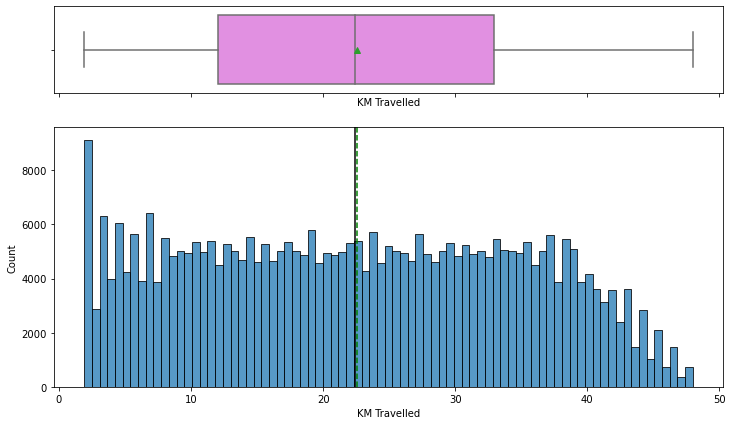

In [22]:
# Checking for KM Travelled
histogram_boxplot(Final_df_copy, "KM Travelled")


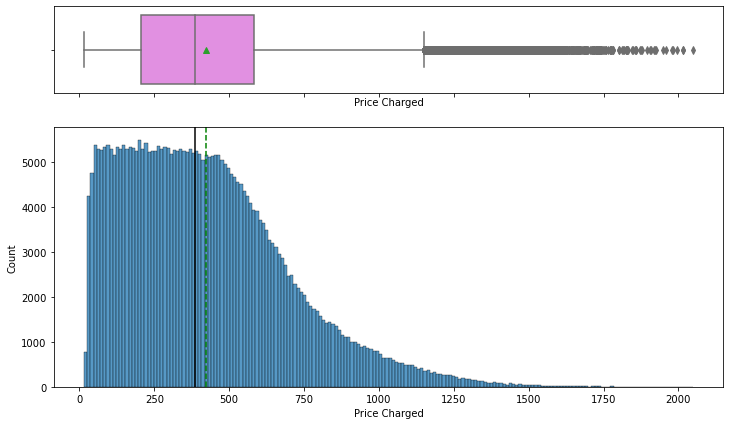

In [23]:
#checking for Price Charged  
histogram_boxplot(Final_df_copy, "Price Charged")

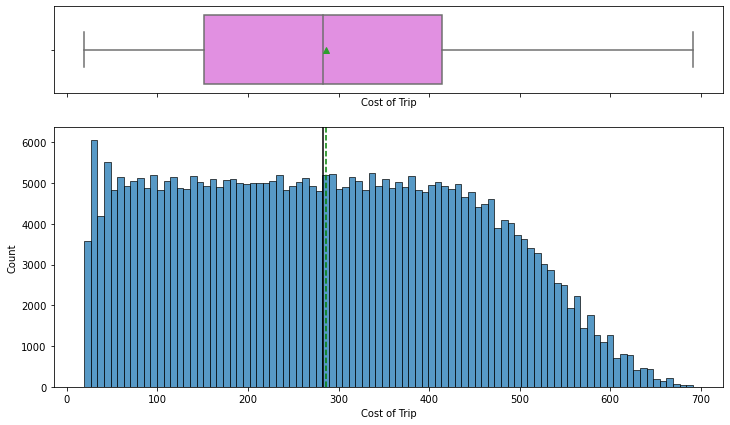

In [24]:
#checking for Cost of Trip
histogram_boxplot(Final_df_copy, "Cost of Trip")

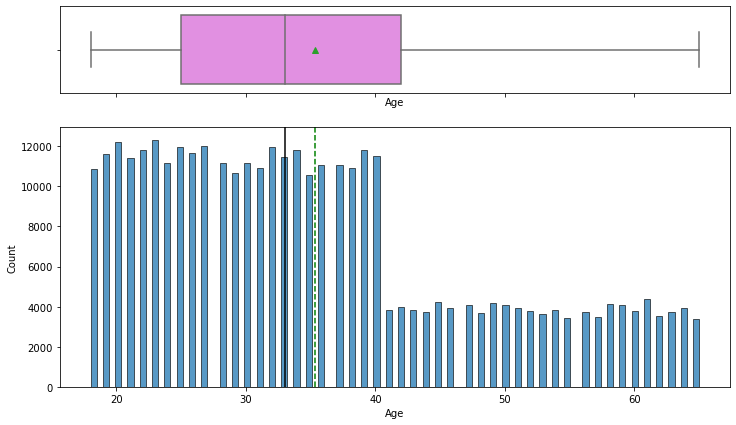

In [25]:
#checking for Age
histogram_boxplot(Final_df_copy, "Age")

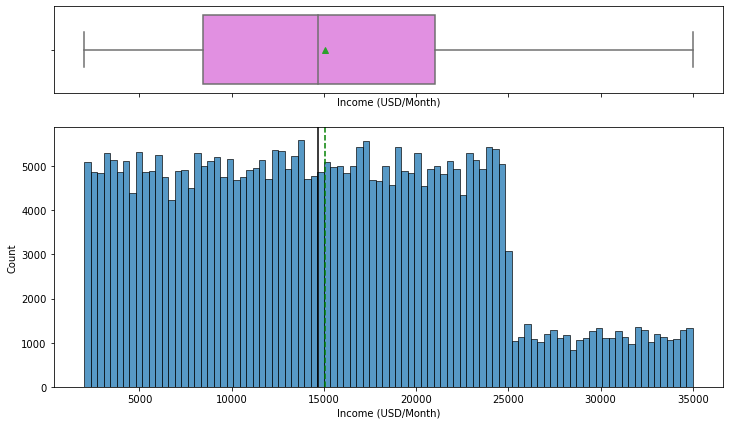

In [26]:
#checking for income
histogram_boxplot(Final_df_copy, "Income (USD/Month)")

# Correlation

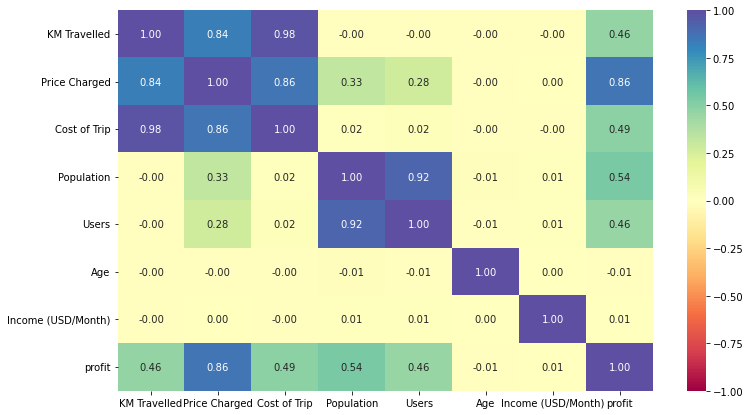

<Figure size 432x288 with 0 Axes>

In [27]:
cols_list = Final_df_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    Final_df_copy[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
plt.savefig("heatmap.png")

# Hypothesis

###### 1. Wealthy customers prefer pink cab?


In [28]:
# selecting rows based on condition 

pinkcab_df = Final_df_copy[(Final_df_copy['Company'] == 'Pink Cab')]
pinkcab_df.head()                         

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit
0,10000011,2020-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,57.315
1,10000012,2020-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,23.666
2,10000013,2020-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,27.568
3,10000014,2020-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,25.798
4,10000015,2020-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,16.844


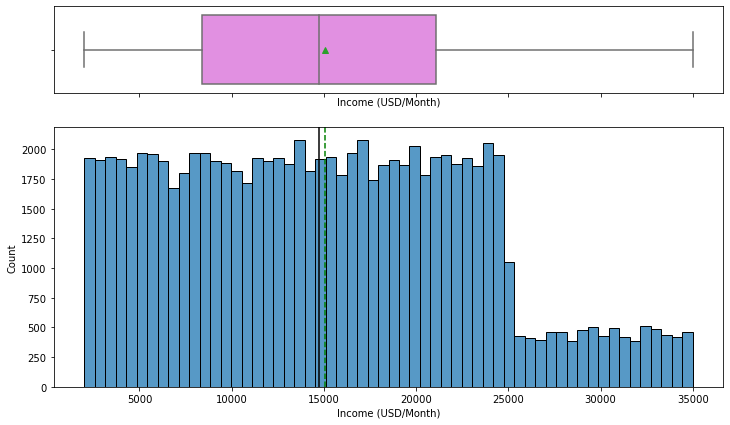

In [29]:
#checking for pink cab customer income
histogram_boxplot(pinkcab_df, "Income (USD/Month)")

In [40]:
# selecting rows based on condition 

yellowcab_df = Final_df_copy[(Final_df_copy['Company'] == 'Yellow Cab')]
yellowcab_df.head()   

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),profit
233,10000384,2020-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,814885,24701,27602,Card,Male,23,8542,877.0076
234,10000385,2020-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,814885,24701,27594,Cash,Male,28,3901,895.7768
235,10000386,2020-01-03,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,814885,24701,27884,Cash,Male,32,13505,232.3320
236,10000387,2020-01-06,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,814885,24701,28533,Cash,Male,39,28386,504.1600
237,10000388,2020-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,814885,24701,29039,Card,Male,35,17761,944.1908


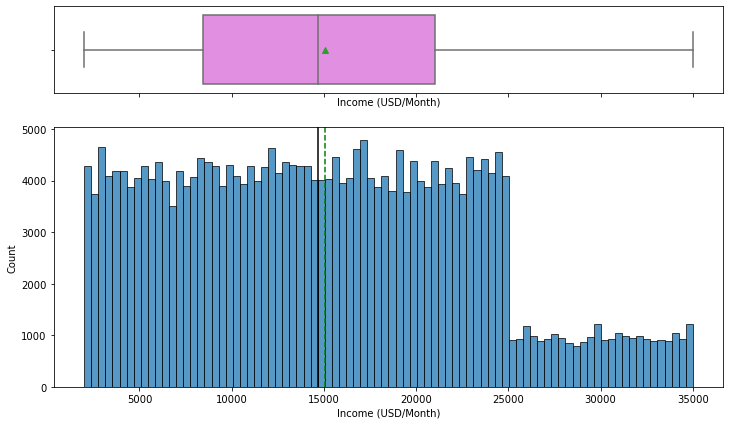

In [31]:
#checking for yellow cab customer income
histogram_boxplot(yellowcab_df, "Income (USD/Month)")

It seems like customer transcations are higher for yellow cab irrespective of the income.
Hence the hypothesis proved wrong

### 2.pink cab has more profit than yellow cab?

In [38]:
 #Use GroupBy() & compute sum on profitcolumn
    
df_profit = Final_df_copy.groupby('Company')['profit'].sum()


In [39]:
df_profit.head()

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: profit, dtype: float64

Its well clear that pink cab has more profit than yellow cab
Hence hypothesis is proved

### 3.Pink cab has more customers than yellow?

In [42]:
 #Use GroupBy() & count customer
    
Final_df_copy.groupby('Company')['Customer ID'].count()


Company
Pink Cab       84711
Yellow Cab    274681
Name: Customer ID, dtype: int64

Yellow cab has more customers than pink cab.Hence hypothesis proved wrong

### 4. card payment mode used more than cash?

In [43]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

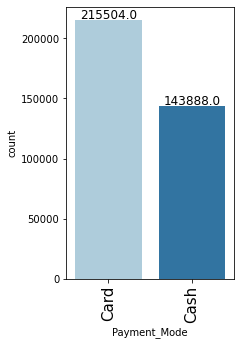

In [50]:
labeled_barplot( Final_df_copy, "Payment_Mode")

people prefer card payment mode than cash.Hence proved

### 5.Female uses/trust pink cab more than yellow due to safety features?

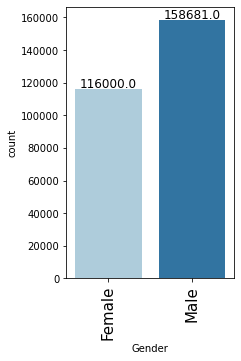

In [51]:
labeled_barplot(
    yellowcab_df, "Gender")

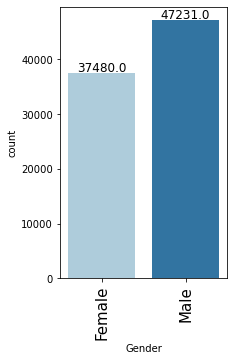

In [52]:
labeled_barplot(
    pinkcab_df, "Gender")

Male customers are in majority at both companies.Hence hypothesis is wrong